In [2]:
import pandas as pd

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Fake.csv to Fake.csv
Saving True.csv to True.csv


In [4]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Fake.csv']))
df1 = pd.read_csv(io.BytesIO(uploaded['True.csv']))
# Dataset is now stored in a Pandas Dataframe

# df = pd.read_csv(r'E:\CSE 422 project\Fake.csv')
# df1 = pd.read_csv(r'E:\CSE 422 project\True.csv')

#### df = fake news dataframe, df1 = true news dataframe
#### label  0 = false , 1 = true

#### we are doing supervised learning,  In supervised learning, the algorithm “learns” from the training dataset by iteratively making predictions on the data and adjusting for the correct answer. For supervised learning to work, you need a labeled set of data that the model can learn from to make correct decisions. Data labeling typically starts by asking humans to make judgments about a given piece of unlabeled data.

#### that is why we labeled the fake news data as 0 and 1

In [5]:
df['Label'] = 0 # adding a new column named label and value 0 to it

In [6]:
df.head(2) # to see the 1st 2 value of dataframe

,title,text,subject,date,Label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0


In [7]:
df1['Label'] = 1 # adding a new column named label and value 1 to it

In [8]:
df1.head(2)  # to see the 1st 2 value of dataframe

,title,text,subject,date,Label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1


In [9]:
frames = [df, df1] # combining two dataframes

In [10]:
c_df = pd.concat(frames) # c_df = combining dataset  

#### we cant feed the model same data , like only the fake news, we have to balance out the fake news and true news, that is why we combined the dataset.

In [11]:
c_df.shape

(44898, 5)

In [12]:
c_df.sample(2) 
'''
The sample() function is used to get a random sample of items, we get random rows.
this random rows is important to balance out the true and false news.
''' 

'\nThe sample() function is used to get a random sample of items, we get random rows.\nthis random rows is important to balance out the true and false news.\n'

# Preprocessing 

In [13]:
c_df.isnull().sum() # checking if there is any null values

title      0
text       0
subject    0
date       0
Label      0
dtype: int64

In [14]:
# dropping unncessary columns
u_df = c_df.drop(['subject','date'], axis=1)  # subject and data is not necessary for checking , thats why we dropped the columns

In [15]:
u_df.head(2)

,title,text,Label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,0


In [16]:
u_df['content'] = u_df['title']+' '+u_df['text'] # adding the title and the text columns data, 
# because oour model will learn from the 
# headlines as well as text, and based on that it will give out result.

In [17]:
u_df.head(3)

,title,text,Label,content
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,0,Donald Trump Sends Out Embarrassing New Year’...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,0,Drunk Bragging Trump Staffer Started Russian ...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",0,Sheriff David Clarke Becomes An Internet Joke...


In [18]:
u_df.shape # we have around 44k data 

(44898, 4)

In [19]:
sameple_df = u_df.sample(5000) 
# we cant take all this data, becasue it will take a lot of time to train, that is why we took 5000 data for traing,
# we took sample data because we want randomness, we cant take only the 1st 5000 data, .sample(5000), will provide
# diffrerent true and false news data of 5000

In [20]:
sameple_df['Label'].value_counts()
# you can see here we have 0 = false = 2606 and 1 = true = 2394, this will change, every time you run

0    2629
1    2371
Name: Label, dtype: int64

## Visualizing data

In [21]:
import matplotlib.pyplot as plot

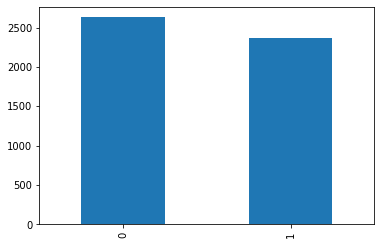

In [22]:
sameple_df["Label"].value_counts().plot.bar()

plot.show()

#### as you can see, we have almost similar amount of data( true and false ) for training.

In [23]:
X = sameple_df.drop(columns='Label', axis=1)
Y = sameple_df['Label'] 

In [24]:
import re
import nltk
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [25]:
port_stem = PorterStemmer()

In [26]:
# explaind all the steps below
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)  # content 1 
    stemmed_content = stemmed_content.lower() # content 2
    stemmed_content = stemmed_content.split() # content 3 
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')] #content .
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [27]:
sameple_df['content'] =sameple_df['content'].apply(stemming) # this will take around 5-8min

### content 1 - > regex
RE helps us to match or find other strings or sets of strings, using a specialized syntax held in a pattern. We used it basically to get the text data and remove the word or syntax, which not belong to our alphabet.

### content 2 - > lower
Lowercasing. This is the simplest technique of text preprocessing which consists of lowercasing every single token of the input text. It helps in dealing with sparsity issues in the dataset

### content 2 - > removing punctuation
An important NLP preprocessing step is punctuation marks removal, this marks - used to divide text into sentences, paragraphs and phrases - affects the results of any text processing approach, especially what depends on the occurrence frequencies of words and phrases, since the punctuation marks are used frequently.
The main reason to separate punctuation by spacing in a sentence is to get a vector representation of words.

### content 4 - > stopwords
Stop words are available in abundance in any human language. By removing these words, we remove the low-level information from our text in order to give more focus to the important information

In [28]:
#separating the data and label
X = sameple_df['content'].values
Y = sameple_df['Label'].values

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [30]:
# converting the textual data to numerical data , machine only understand numerical data
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

# Spliting data

In [31]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

# Training our model

### Logisitic Regression

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
model = LogisticRegression()

In [35]:
model.fit(X_train,Y_train)

LogisticRegression()

In [36]:
# accuracy score on the training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [37]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.987


In [38]:
# accuracy score on the test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.965


### Linear Regression

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
model_2 = LinearRegression()

In [41]:
model_2.fit(X_train, Y_train)

LinearRegression()

In [42]:
# accuracy score on the training data
X_train_prediction = model_2.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score of the training data : ', training_data_accuracy)

ValueError: ignored

### SVM

In [43]:
from sklearn import svm

In [44]:
model_3 = svm.SVC(kernel='linear') # Linear Kernel

In [45]:
model_3.fit(X_train, Y_train)

SVC(kernel='linear')

In [46]:
# accuracy score on the training data
X_train_prediction = model_3.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.9975


In [47]:
# accuracy score on the test data
X_test_prediction = model_3.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.975


### Decision Tree

In [48]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
model_4 =  DecisionTreeClassifier()

In [50]:
model_4.fit(X_train, Y_train)

DecisionTreeClassifier()

In [51]:
# accuracy score on the training data
X_train_prediction = model_4.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  1.0


In [52]:
# accuracy score on the test data
X_test_prediction = model_3.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.975


# Testing 

# With Decision Tree

In [53]:
X_new = X_test[83] # change the value in here. 

prediction = model_4.predict(X_new)
print('label : ',prediction)

if (prediction[0]==0):
  print('The news is Fake')
else:
  print('The news is True')

label :  [1]
The news is True


In [54]:
X_new = X_test[82] # change the value in here. 

prediction = model_4.predict(X_new)
print('label : ',prediction)

if (prediction[0]==0):
  print('The news is Fake')
else:
  print('The news is True')

label :  [1]
The news is True


# With Support Vector Machiene

In [55]:
X_new = X_test[83] # change the value in here. 

prediction = model_3.predict(X_new)
print('label : ',prediction)

if (prediction[0]==0):
  print('The news is Fake')
else:
  print('The news is True')

label :  [1]
The news is True


In [56]:
X_new = X_test[82] # change the value in here. 

prediction = model_3.predict(X_new)
print('label : ',prediction)

if (prediction[0]==0):
  print('The news is Fake')
else:
  print('The news is True')

label :  [1]
The news is True


In [57]:
B

NameError: ignored